# Import Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [176]:
!pip install umap-learn --user

In [177]:
!pip install numpy==1.24.1

In [178]:
import numpy

In [179]:
pip install --upgrade numba

Note: you may need to restart the kernel to use updated packages.


In [180]:
!pip show numpy

Name: numpy
Version: 1.24.1
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: C:\Users\STSC\anaconda3\Lib\site-packages
Requires: 
Required-by: altair, astropy, bokeh, Bottleneck, catboost, category-encoders, chroma-hnswlib, chromadb, contourpy, daal4py, datasets, datashader, datashape, deap, dmba, folium, gensim, gower, gradio, gurobi-machinelearning, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, keras, keras-nightly, langchain, langchain-community, lightgbm, matplotlib, mkl-fft, mkl-random, ml-dtypes, mlxtend, numba, numexpr, onnxruntime, opt-einsum, pandas, patsy, pyarrow, pyerfa, PyWavelets, scikit-image, scikit-learn, scikit-surprise, scipy, seaborn, shapely, statsmodels, tables, tb-nightly, tensorboard, tensorflow-intel, tifffile, TPOT, transformers, umap-learn, xarray, xgboost


In [181]:
import umap
import pandas as pd

# Loading Dataset

In [182]:
fastfood_df = pd.read_csv(r'C:\Users\STSC\Desktop\BAN 674- Machine Learning\Assignment 6\fastfood.csv')


In [183]:
fastfood_df.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0   20.0     20.0  Other  
1     18     46.0    6.0   20.0     20.0  Other  
2     18     70.0   10.0   20.0     50.0  Other  
3     18     55.0    6.0   25.0     20.0  Other  
4     18     46.0    6.0   20.0     20.0  Other

In [184]:
print(fastfood_df['restaurant'].unique())
print(fastfood_df['salad'].unique())


['Mcdonalds' 'Chick Fil-A' 'Sonic' 'Arbys' 'Burger King' 'Dairy Queen'
 'Subway' 'Taco Bell']
['Other']


In [185]:
# Check for NaN values
print(fastfood_df.isnull().sum())


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64


In [186]:
fastfood_df.dtypes

restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

# Visualise distributions

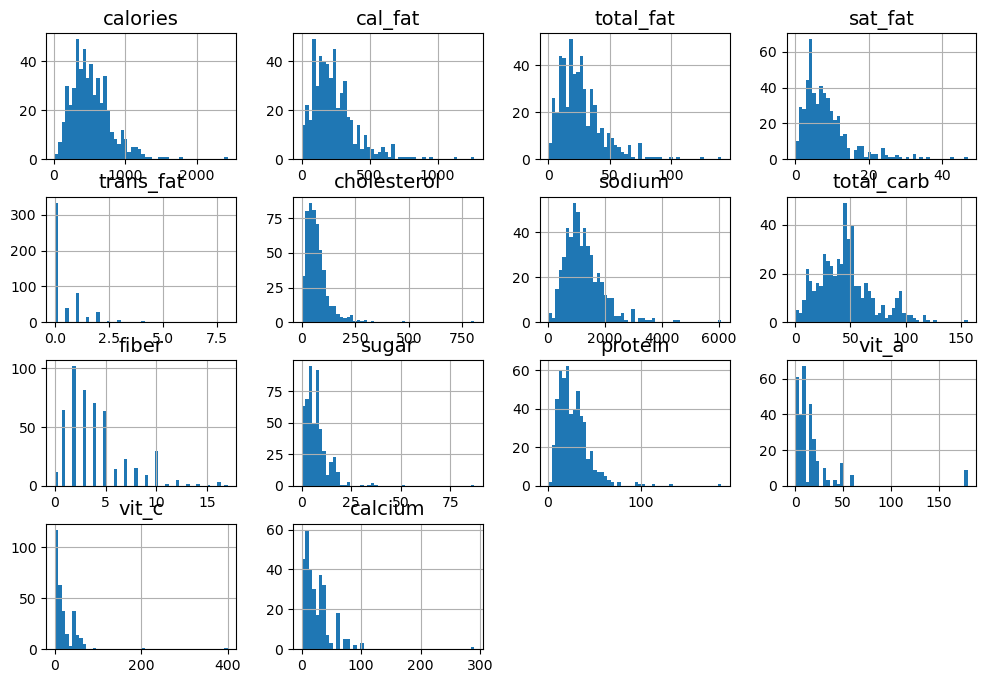

In [187]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fastfood_df.hist(bins=50, figsize=(12, 8))

plt.show()



In [188]:
fastfood_df['trans_fat'].unique()


array([0. , 1.5, 3. , 0.5, 1. , 2.5, 2. , 4. , 8. , 3.5])

Numerical features:


1. calories
2. cal_Fat   
3. sat_fat
4. trans_fat
5. cholestrol
6. sodium
7. total_carb
8. sugar
9. protein
10. vit_a
11. vit_c
12. calcium

# Preprocessing

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, TargetEncoder, QuantileTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


In [190]:
print(fastfood_df.isnull().sum())


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64


In [191]:
# prompt: printing minimum value in each column

# printing minimum value in each column
for column in fastfood_df.columns:
  print(f"Minimum value in column {column}: {fastfood_df[column].min()}")


Minimum value in column restaurant: Arbys
Minimum value in column item: 1 Piece Chick-n-Strips
Minimum value in column calories: 20
Minimum value in column cal_fat: 0
Minimum value in column total_fat: 0
Minimum value in column sat_fat: 0.0
Minimum value in column trans_fat: 0.0
Minimum value in column cholesterol: 0
Minimum value in column sodium: 15
Minimum value in column total_carb: 0
Minimum value in column fiber: 0.0
Minimum value in column sugar: 0
Minimum value in column protein: 1.0
Minimum value in column vit_a: 0.0
Minimum value in column vit_c: 0.0
Minimum value in column calcium: 0.0
Minimum value in column salad: Other


In [192]:
# prompt: finding which columns have negative values

# Check for negative values
for col in fastfood_df.columns:
  if fastfood_df[col].dtype in ['int64', 'float64']:
    if (fastfood_df[col] < 0).any():
      print(f"Column '{col}' contains negative values.")


In [193]:
log_attribs = ["vit_a", "vit_c", "cholesterol", "calcium"]
quant_attribs = [ "calories", "cal_fat", "total_fat", "sat_fat", "sodium", "total_carb", "sugar", "protein"]
cat_attribs = ["restaurant"]

log_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=5)), ('scaler', StandardScaler()), ('min_max_scaler', MinMaxScaler(feature_range=(0, 1)))])
#log_pipeline2 = Pipeline([("impute", KNNImputer(n_neighbors=5)), ("log transform", PowerTransformer(method = 'box-cox')), ("scaler", StandardScaler()), ('min_max_scaler', MinMaxScaler(feature_range=(0, 1))])
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])
quantile_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=5)), ('scaler', StandardScaler()), ('min_max_scaler', MinMaxScaler(feature_range=(0, 1)))])
#quantile_pipeline2 = Pipeline([("impute", KNNImputer(n_neighbors=5)), ("quantile transformer", QuantileTransformer(n_quantiles=100)), ('scaler', StandardScaler()), ('min_max_scaler', MinMaxScaler(feature_range=(0, 1)))])

fastfood_p = fastfood_df.drop(['item', 'salad'], axis=1)

# replace missing values in fiber with 0
fastfood_p["fiber"] = fastfood_p["fiber"].fillna(0)

preprocessing = ColumnTransformer([
    ("quant", quantile_pipeline, quant_attribs),
    ("logdist", log_pipeline, log_attribs),
    ("cat", cat_pipeline, cat_attribs)
])


# Apply the pipeline to ntri_processed
fastfood_processed = preprocessing.fit_transform(fastfood_p)

In [194]:
fastfood_processed.shape

(515, 20)

#Visualise data

In [195]:
import seaborn as sns


C:\Users\STSC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


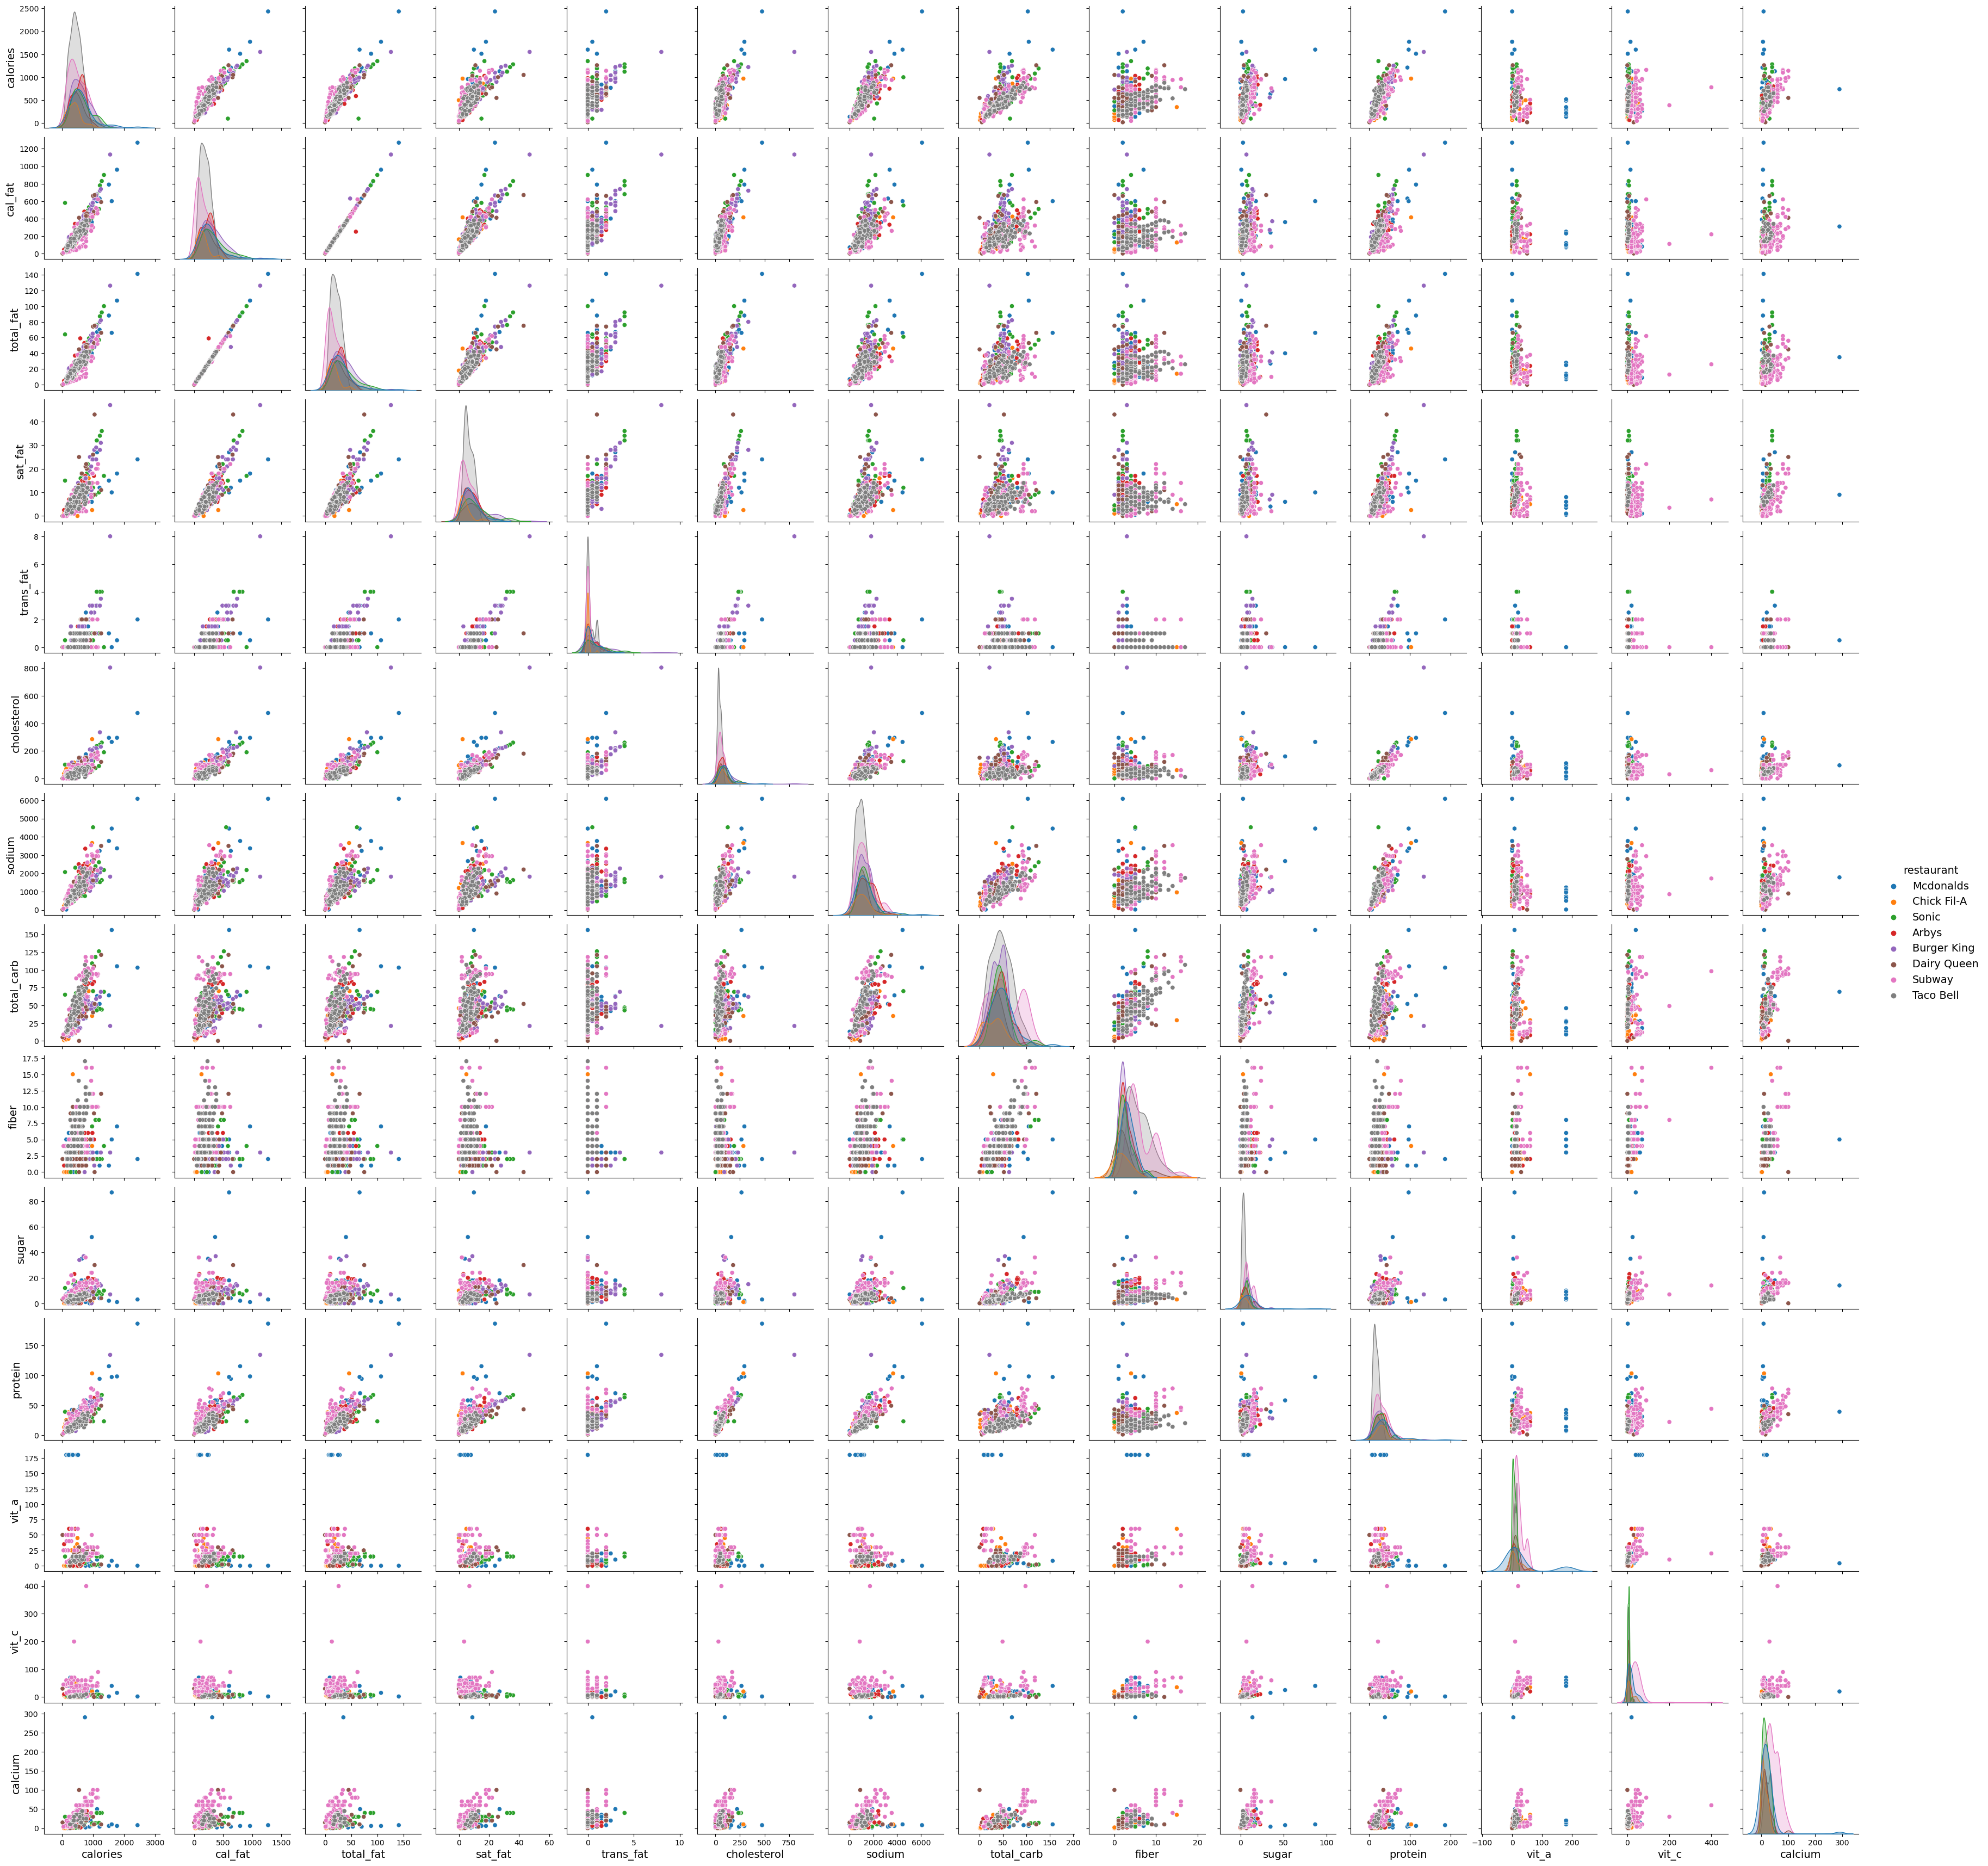

In [196]:
sns.pairplot(fastfood_df.drop(['item', 'salad'], axis=1), hue='restaurant');

Interpretation of calories:


- Calories and cal_fat- with increased cal_fat most of the foods have high calories
- Calories and total_fat- with increased total_fat most of the foods have high calories
- Calories and sat_fat- with increased total_fat most of the foods have high calories except for foods in restaurant McDonald, where the more sat_fat increases the more calories 
- Calories and trans_fat- even if foods have low trans_fat, the calories are more. Taco Bell’s foods have low trans_fat. Sonic’s foods have high trans_fat
- Calories and cholesterol- all the foods have increased calories with increase in cholesterol. Taco Bell has low cholesterol, Chick-fil-A and Sonic have low cholesterol and calories in their foods compared to the other restaurants
- Calories and sodium- Most of the foods have high sodium and calories correlation in their foods. Taco Bell and Subway have foods of varying sodium, still with low calories. McDonalds’s foods are high in sodium and calories
- Calories and total_carb- Most of the foods have high carb and calories correlation in their foods. Taco Bell and Subway have foods of varying carb, still with reasonable calories. McDonalds’s foods are high in carb and calories
- Calories and fiber- even if foods have low fiber, the calories are more. Dairy queen’s, Chick-fil-A Sonic and Arbys foods have low fiber. McDonald’s foods are low in fiber and high in calories
- Calories and sugar- all restaurants have reasonable sugar contents in their foods. Some items of Mcdonalds have high sugar. Some items of Dairy Queen and Subway have medium sugar.
- Calories and protein- as the protein in food items increase, the calories in them increase. Some items of Mcdonalds, Chick-Fil-A, Burger King and Subway have high protein.
- Calories and vit_a- Most items have low and upto average vit_a. McDonalds- some items are high in vit_a and low in calories and some items are high in calories and low in vit_a. Subway has average vit_a but low calories.
- Calories and vit_c- Most items have low and upto average vit_c. McDonalds- some items are high in calories and low in vit_a. Subway has some items with high vit_c and low calories
- Calories and calcium- Most items have low and upto average calcium. McDonald’s items ingeneral are very low or null in calcium and high in calories. Subway has correlation in some of its items .


## Plot data

In [197]:
# prompt: convert fastfood_processed dataframe

fastfood_processed_df = pd.DataFrame(fastfood_processed)


In [198]:
X = pd.DataFrame(
    fastfood_processed,
    columns=preprocessing.get_feature_names_out(),
    index=fastfood_p.index)
X.head(2)

quant__calories  quant__cal_fat  quant__total_fat  quant__sat_fat  \
0         0.149378        0.047244          0.049645        0.042553   
1         0.340249        0.322835          0.319149        0.361702   

   quant__sodium  quant__total_carb  quant__sugar  quant__protein  \
0       0.180544           0.282051      0.126437        0.194595   
1       0.258038           0.397436      0.206897        0.243243   

   logdist__vit_a  logdist__vit_c  logdist__cholesterol  logdist__calcium  \
0        0.022222            0.05              0.118012          0.068966   
1        0.033333            0.05              0.161491          0.068966   

   cat__restaurant_Arbys  cat__restaurant_Burger King  \
0                    0.0                          0.0   
1                    0.0                          0.0   

   cat__restaurant_Chick Fil-A  cat__restaurant_Dairy Queen  \
0                          0.0                          0.0   
1                          0.0                          0.0   

   cat__restaurant_Mcdonalds  cat__restaurant_Sonic  cat__restaurant_Subway  \
0                        1.0                    0.0                     0.0   
1                        1.0                    0.0                     0.0   

   cat__restaurant_Taco Bell  
0                        0.0  
1                        0.0

In [199]:
y = fastfood_p['restaurant']
n_samples, n_features = X.shape
n_neighbors = 30

In [200]:
y

0      Mcdonalds
1      Mcdonalds
2      Mcdonalds
3      Mcdonalds
4      Mcdonalds
         ...    
510    Taco Bell
511    Taco Bell
512    Taco Bell
513    Taco Bell
514    Taco Bell
Name: restaurant, Length: 515, dtype: object

In [201]:
restaurant_names = y.unique()
restaurant_names

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [202]:
#Creating mapper for 'Bond rating'
y_copy = y.copy()
scale_mapper= {"Mcdonalds":1 ,
               "Chick Fil-A":2, 
               "Sonic":3, 
               "Arbys":4, 
               "Burger King":5, 
               "Dairy Queen":6, 
               "Subway": 7,
               "Taco Bell": 8
               }


# #Replacing restaurant values with scale_mapper
y_copy.replace(scale_mapper, inplace=True)
y_copy


0      1
1      1
2      1
3      1
4      1
      ..
510    8
511    8
512    8
513    8
514    8
Name: restaurant, Length: 515, dtype: int64

# Plotting data in 3-D 

In [76]:
X_array = X.to_numpy()
y_array = y_copy.to_numpy()


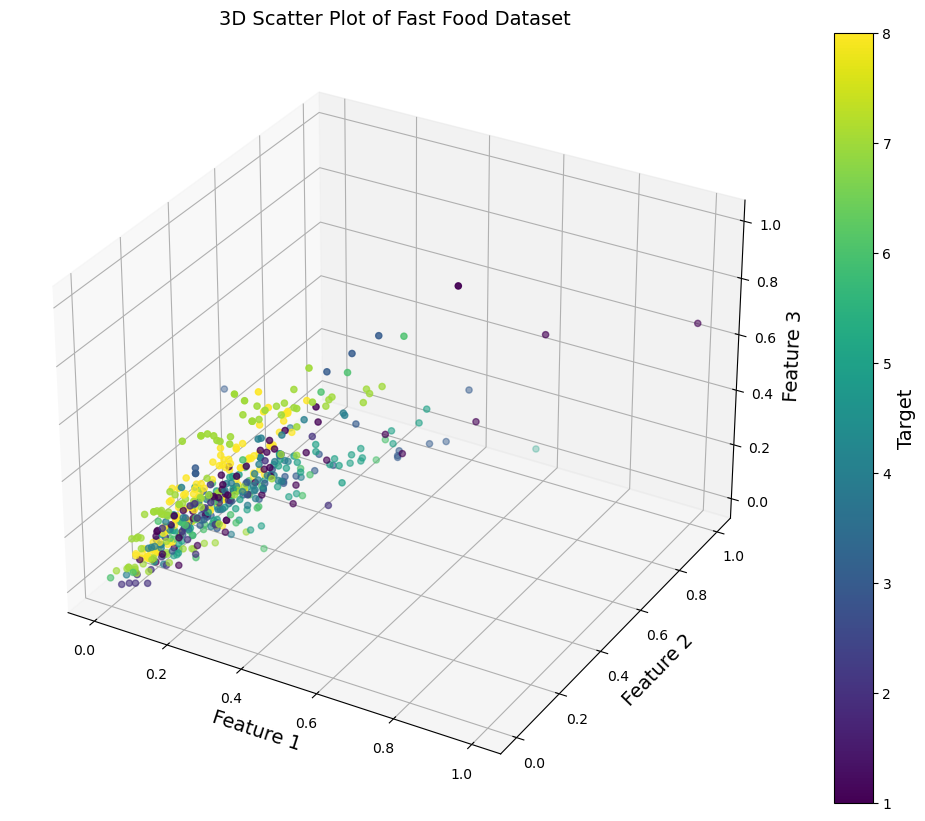

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# # Load data (example with Iris dataset)
# data = load_iris()
# X = data.data
# y = data.target

# Create a 3D scatter plot

fig = plt.figure(figsize=(14, 10)) 
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_array[:, 0], X_array[:, 2], X_array[:, 5], c=y_array, cmap='viridis', marker='o')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Target')

# Labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Fast Food Dataset')


# Show plot
plt.show()

# Embedding Techniques Comparison

-Embeddings are lower-dimensional vectors
-The main goal of embeddings is to create a more manageable representation of data that preserves relevant relationships and structures, making it easier to apply machine learning algorithms like clustering.
-Main purposes include:
    -reduce dimensionality while still preserving relationships as higher dimensions make clustering less effective(“curse of dimensionality”) 
    -improves performance as algorithms perform better in lower-dimensional spaces (distance metrics are more meaningful and computationally efficient)


In [118]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.pipeline import make_pipeline

embeddings = {
    "Principal Component Analysis": PCA(n_components=5, random_state=42),
    "Truncated SVD embedding": TruncatedSVD(n_components=10),
    "Isomap embedding": Isomap(n_neighbors=10, n_components=2),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2, random_state=42),
    "Spectral embedding": SpectralEmbedding(
        n_components=4, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "UMAP embedding": umap.UMAP(
        n_components=2,
        random_state=42,
    ),

}

### Run models

In [ ]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 812.7 kB/s eta 0:00:14
   - -------------------------------------- 0.3/11.0 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.0 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 6.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.0 MB 8.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.0 MB 8.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/11.0 MB 9.1 MB/s eta 0:00:01
   -------------- ------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\STSC\\AppData\\Roaming\\Python\\Python311\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [96]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    data = X
    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data)
    timing[name] = time() - start_time

Computing Principal Component Analysis...
Computing Truncated SVD embedding...
Computing Isomap embedding...
Computing MDS embedding...
Computing Spectral embedding...
Computing t-SNE embedding...


C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Computing UMAP embedding...


C:\Users\STSC\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## Plot projections

In [97]:
# give a number to each restaurant in the dataset

# Create a dictionary to map restaurant names to numbers
restaurant_mapping = {restaurant: i for i, restaurant in enumerate(fastfood_df['restaurant'].unique())}

# Add a new column 'restaurant_number' to the DataFrame
fastfood_df['restaurant_number'] = fastfood_df['restaurant'].map(restaurant_mapping)

# Display the updated DataFrame
print(fastfood_df.head())


  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  restaurant_number  
0    

In [99]:
X_transformed

array([[ 1.8442224 , 15.227507  ],
       [ 0.8518162 , 14.813777  ],
       [ 0.84255844, 14.734633  ],
       ...,
       [17.381945  ,  4.150276  ],
       [17.221987  ,  2.6665957 ],
       [17.17415   ,  2.7019823 ]], dtype=float32)

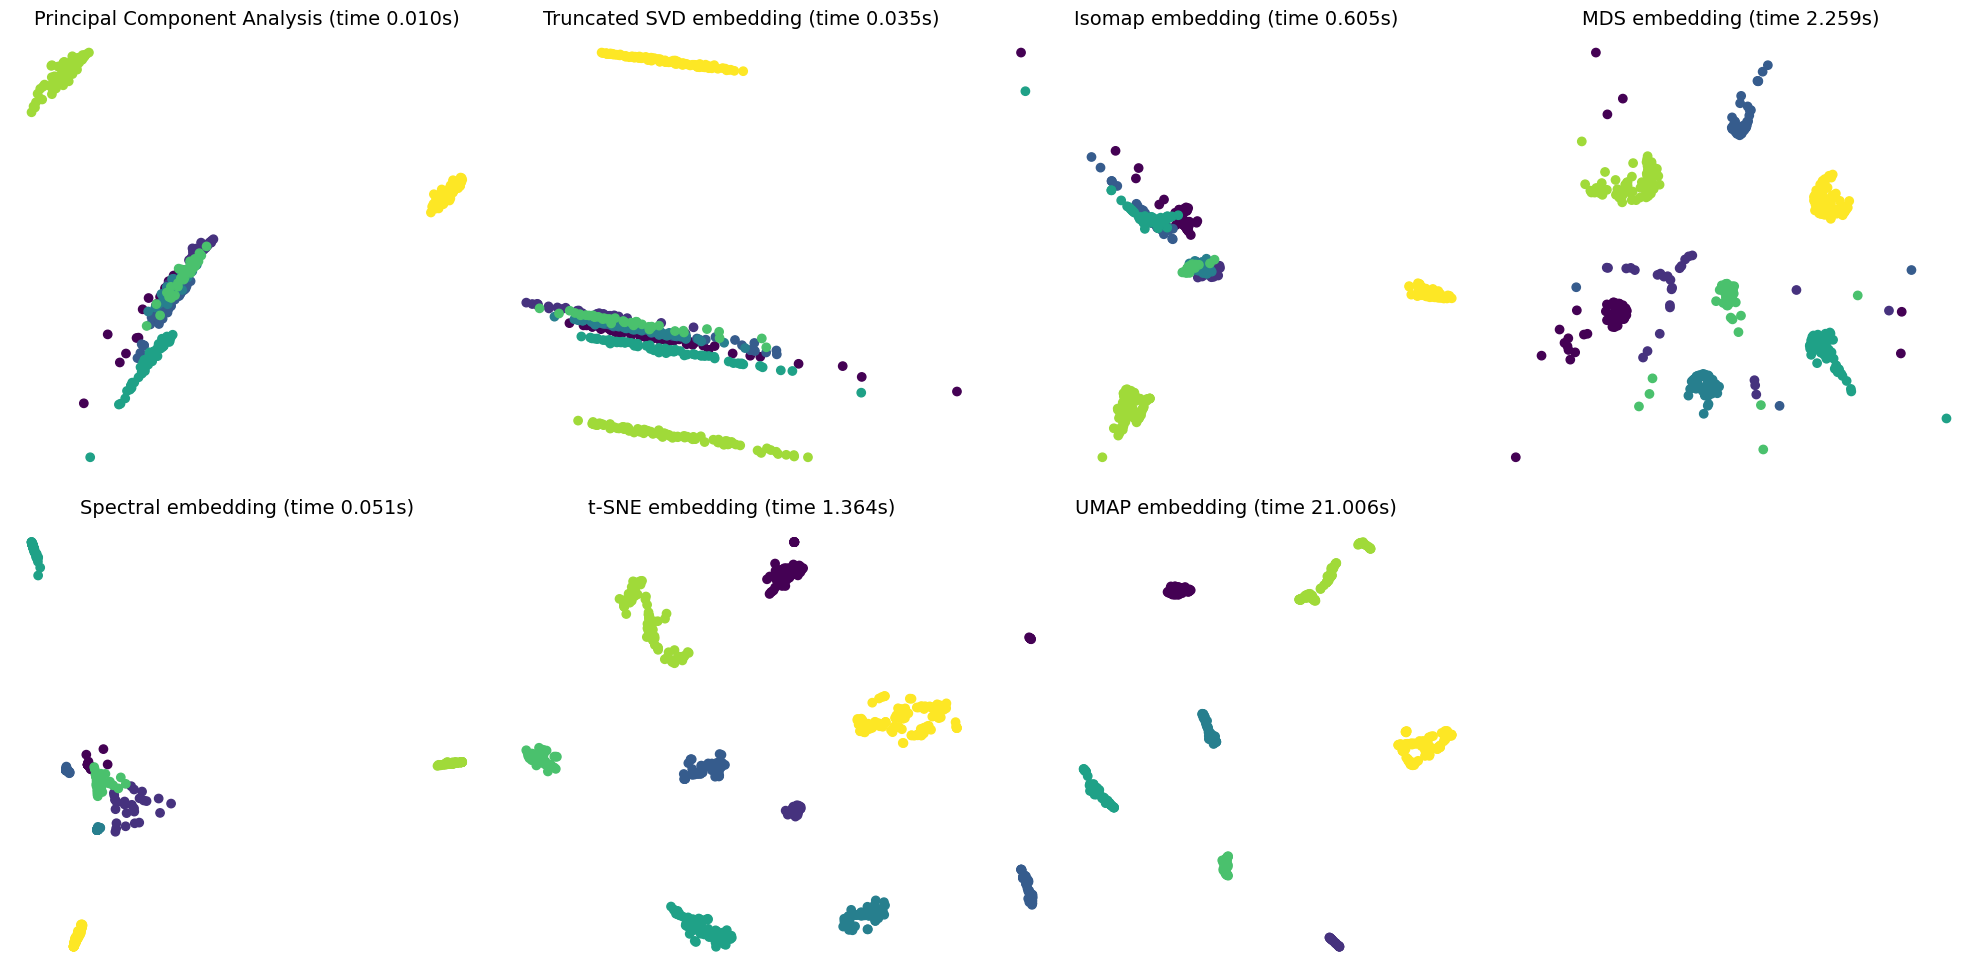

In [119]:
# prompt: plotting different clustering embedding together

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

i = 0
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    X_transformed = projections[name]
    colors= list(range(0,8))
    # Plot the transformed data
    axs[i].scatter(X_transformed[:, 0], X_transformed[:, 1], c=fastfood_df['restaurant_number'], cmap='viridis')
    axs[i].set_title(title)
    axs[i].axis('off')

    i += 1

# Hide any unused subplots
for j in range(i, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


- PCA
Captures linear relationships between features. Since the clusters in the original high-dimensional space are not linearly separable (as we saw in the pair plots) and are closely packed, PCA is not be able to separate them well in the reduced-dimensional space. 
Therefore, PCA is not a good option for clustering our data

- Truncated SVD embedding
Might not handle differences in the scales of features well. Our data is not scaled, and thus it maybe overlapping.
effectiveness of Truncated SVD depends due to the number of components chosen. If too few components used, the reduced-dimensional space might not capture enough variance to distinguish between clusters effectively leading to overlapping clusters. Even though n_components were increased, the clusters still remain inseparable.

- Isomap embedding
The clusters appear to be overlapping. This could be due to 2 reasons:
1. assumes that the data lies on a low-dimensional manifold embedded in a higher-dimensional space.  If the actual data structure deviates significantly from this assumption, the reduced-dimensional representation might not reflect the true clustering structure.
2. Also, if clusters are not well-separated in terms of geodesic distances on the manifold, Isomap might not be able to distinguish them clearly in the reduced space.

- MDS embedding
The clusters are well-separated.
Reduces dimensionality by preserving distances between instances. 

- Spectral embedding
The clusters seem to be well-separated, however, there is a slight overlap of 2 clusters.
Designed for capturing the underlying structure of complex, non-linearly separable data.

- t-SNE embedding
The clusters are well-separated.
Reduces dimensionality by keeping similar instances close and dissimilar apart.

- UMAP embedding
The clusters are well-separated


# Clustering models

In [ ]:
##K-Means

In [ ]:
###K-Means - Elbow chart

In [203]:
K = range(1, 11)

# List to store the sum of squared distances
ssd = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fastfood_processed)
    ssd.append(kmeans.inertia_)


C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

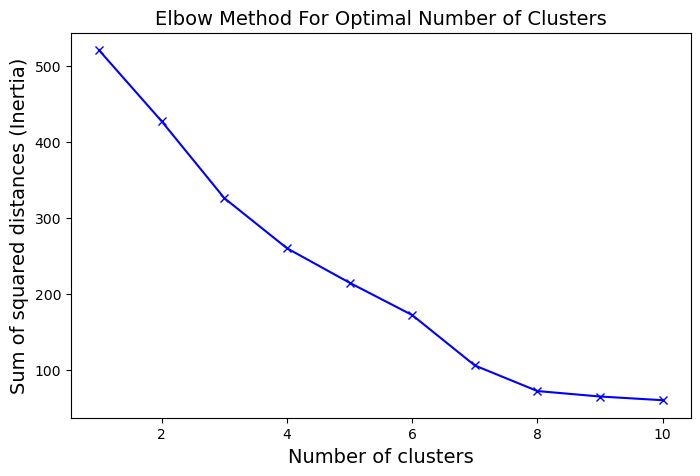

In [204]:
# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [205]:
###K-Means model

In [206]:
# Build the k-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
fastfood_df['cluster1'] = kmeans.fit_predict(fastfood_processed)

C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [207]:
###Visualising results

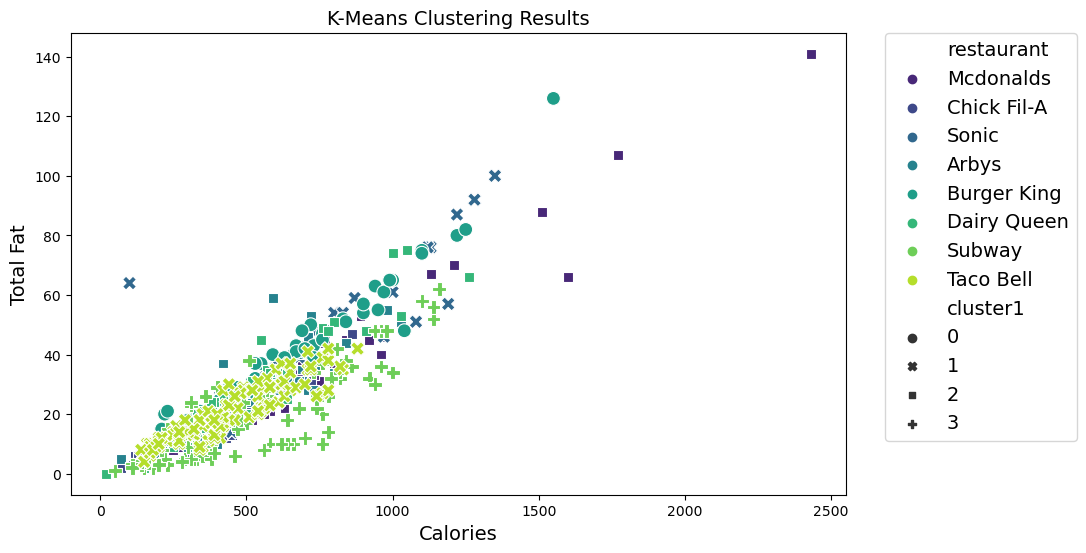

In [211]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='total_fat', hue='restaurant', style='cluster1', data=fastfood_df, palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [209]:
### View Cluster Assignments

In [216]:
# List members of each cluster by instance_name
clusters = fastfood_df.groupby('cluster1')['item'].apply(list).reset_index()
for index, row in clusters.iterrows():
    print(f"Cluster {row['cluster1']}:")
    for instance in row['item']:
        print(f"  - {instance}")


Cluster 0:
  - American Brewhouse King
  - Bacon & Swiss Sourdough King
  - Bacon Cheeseburger
  - Bacon Cheeseburger Deluxe
  - Bacon King
  - Bacon King Jr
  - BBQ Bacon King
  - Cheeseburger
  - Double Bacon Cheeseburger
  - Double Cheeseburger
  - Double Hamburger
  - Double Quarter Pound King
  - Extra Long Cheeseburger
  - Farmhouse King
  - Hamburger
  - Homestyle Cheeseburger
  - Jalapeno King Sandwich
  - Mushroom & Swiss King
  - Rodeo Burger
  - Rodeo King
  - Sourdough King Single
  - Sourdough King Double
  - Steakhouse King
  - Bacon & Cheese Whopper
  - DOUBLE WHOPPER w/o Cheese
  - DOUBLE WHOPPER w/ Cheese
  - WHOPPER w/o Cheese
  - WHOPPER w/ Cheese
  - WHOPPER JR. w/o Cheese
  - WHOPPER JR. w/ Cheese
  - Bacon Cheddar Ranch Chicken Salad w/ grilled Chicken & Dressing
  - Bacon Cheddar Ranch Chicken Salad w/ crispy Chicken & Dressing
  - Chicken BLT Salad w/ Grilled Chicken
  - Chicken BLT Salad w/ Crispy Chicken
  - Chicken Caesar Salad w/ Grilled Chicken
  - Chicken 

In [214]:
# Calculate the metrics
homogeneity = metrics.homogeneity_score(fastfood_df['restaurant'], fastfood_df['cluster1'])
completeness = metrics.completeness_score(fastfood_df['restaurant'], fastfood_df['cluster1'])
v_measure = metrics.v_measure_score(fastfood_df['restaurant'], fastfood_df['cluster1'])
adjusted_rand = metrics.adjusted_rand_score(fastfood_df['restaurant'], fastfood_df['cluster1'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(fastfood_df['restaurant'], fastfood_df['cluster1'])
silhouette = metrics.silhouette_score(fastfood_processed, fastfood_df['cluster1'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.660420693471198
Completeness Score: 0.9999999999999998
V-Measure Score: 0.7954859826404034
Adjusted Rand Index: 0.6038854985967843
Adjusted Mutual Information Score: 0.7928754610310361
Silhouette Score: 0.41972789488742296


Homogeneity Score- Measures the extent to which clusters contain only data points from a single class. A higher Homogeneity Score indicates that the clusters are homogeneous, meaning that the majority of data points in each cluster belong to the same true class.

Completeness Score- Measures whether all data points belonging to a given class are assigned to the same cluster

V-Measure Score- Measures the balance between homogeneity and completeness of the clustering solution. A score of 1 indicates a perfect clustering solution where clusters are both homogeneous and complete.

Adjusted Rand Index- evaluates the quality of clustering by comparing the similarity between the clustering results and the true class labels. 1 indicates perfect agreement between the clustering and the true labels

Adjusted Mutual Information Score- evaluates the quality of clustering by comparing the clustering results with true class labels. 1 indicates perfect agreement between the clustering and the true labels.

Silhouette Score- evaluates the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. 1 indicates that the data points are well clustered, with clear separation between clusters

Completeness Score- 0.99 is a good score indicating that the data points in each cluster belong to their corresponding class
Silhouette Score- 0.41 is a very low score indicating that the clusters have similarity, which explains the overlap.
Therefore,k-Means is not a good clustering solution

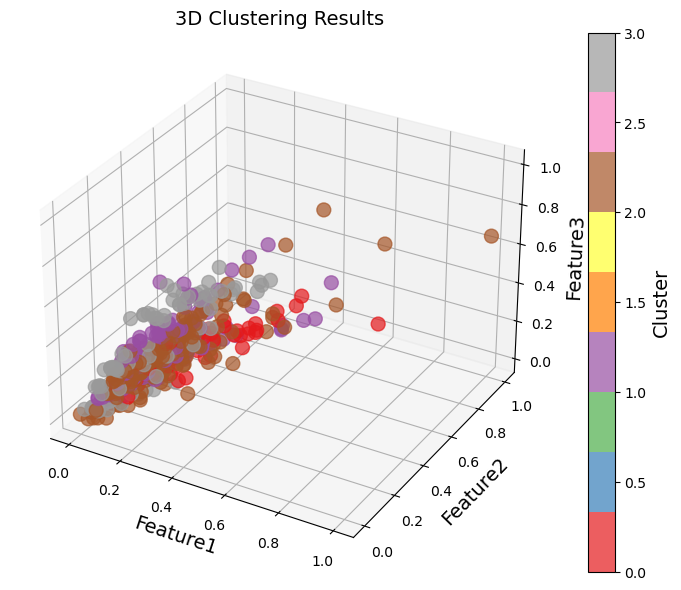

In [217]:
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.labels_


# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_array[:, 0], X_array[:, 2], X_array[:, 5], c=fastfood_df['cluster1'], cmap='Set1', s=100, alpha=0.7)
ax.set_title('3D Clustering Results')
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

C:\Users\STSC\AppData\Local\Temp\ipykernel_10696\2293593243.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


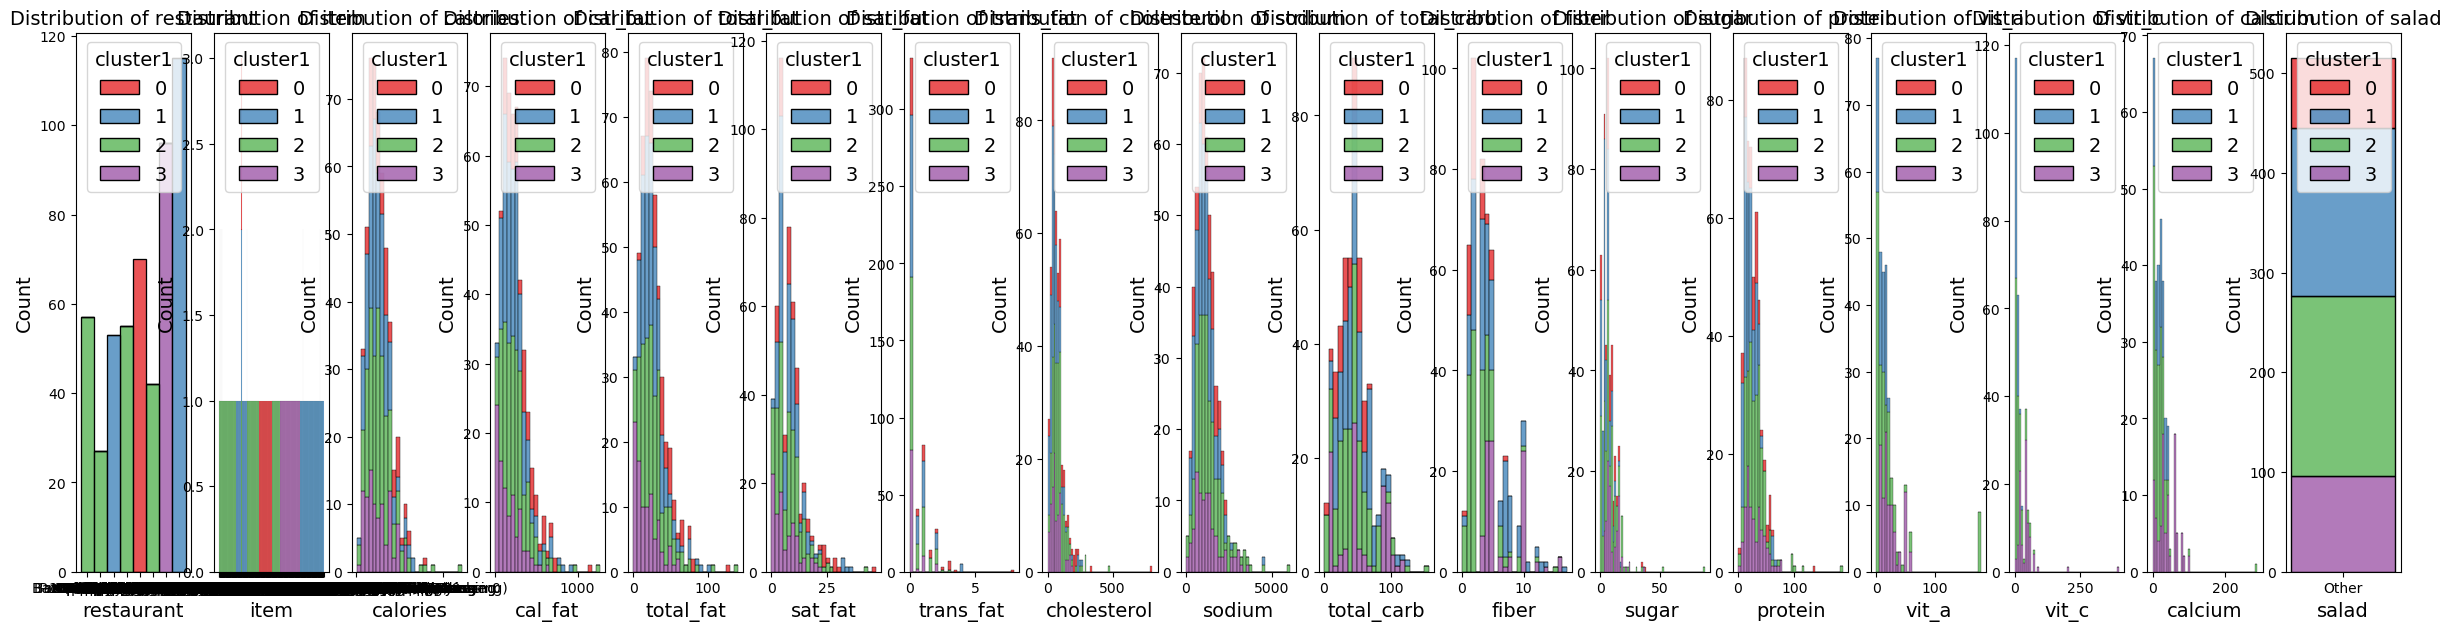

In [225]:
plt.figure(figsize=(30, 7))
for feature in fastfood_df.columns[:-1]:  # Exclude 'Cluster'
    plt.subplot(1, len(fastfood_df.columns) - 1, fastfood_df.columns.get_loc(feature) + 1)
    sns.histplot(data=fastfood_df, x=feature, hue='cluster1', multiple='stack', palette='Set1')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Clustering models

## PCA and UMAP embeddings

In [226]:
umap_embeddings = umap.UMAP(n_components=2, random_state=42).fit_transform(fastfood_processed)
pca_embeddings = PCA(n_components=2, random_state=42).fit_transform(fastfood_processed)

C:\Users\STSC\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


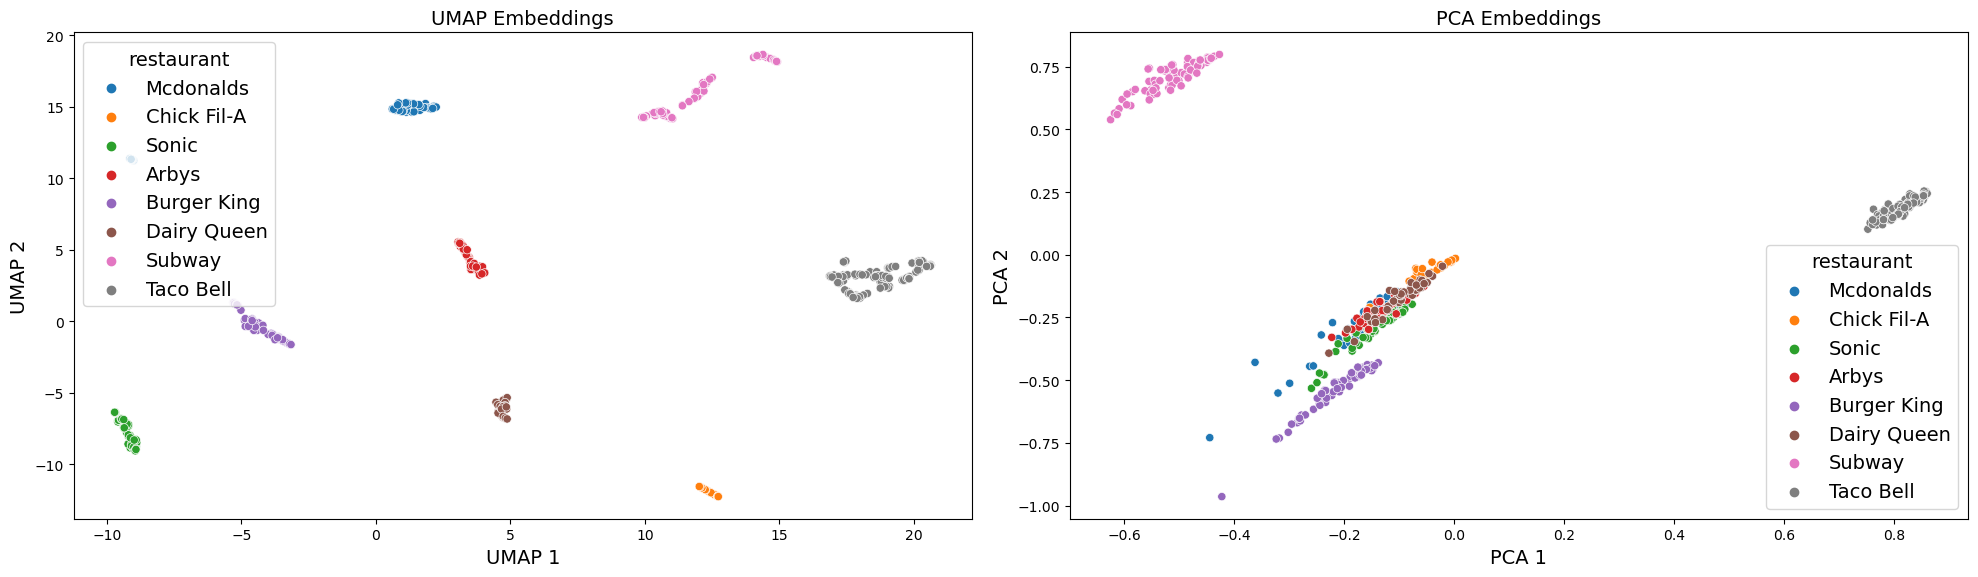

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First subplot for UMAP embeddings
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=fastfood_df['restaurant'], ax=axes[0])
axes[0].set_title('UMAP Embeddings')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')

# Second subplot for PCA embeddings
sns.scatterplot(x=pca_embeddings[:, 0], y=pca_embeddings[:, 1], hue=fastfood_df['restaurant'], ax=axes[1])
axes[1].set_title('PCA Embeddings')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [231]:
#Evaluating UMAP
kmeans = KMeans(n_clusters=4, random_state=42)
fastfood_df['cluster_umap'] = kmeans.fit_predict(umap_embeddings)


# Calculate the metrics
homogeneity = metrics.homogeneity_score(fastfood_df['restaurant'], fastfood_df['cluster_umap'])
completeness = metrics.completeness_score(fastfood_df['restaurant'], fastfood_df['cluster_umap'])
v_measure = metrics.v_measure_score(fastfood_df['restaurant'], fastfood_df['cluster_umap'])
adjusted_rand = metrics.adjusted_rand_score(fastfood_df['restaurant'], fastfood_df['cluster_umap'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(fastfood_df['restaurant'], fastfood_df['cluster_umap'])
silhouette = metrics.silhouette_score(fastfood_processed, fastfood_df['cluster_umap'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.513195069957165
Completeness Score: 0.9549650118776718
V-Measure Score: 0.6676156669029222
Adjusted Rand Index: 0.4616046171400532
Adjusted Mutual Information Score: 0.6645956848914758
Silhouette Score: 0.31764245078941844


UMAP- UMAP clustering method is able to capture the clusters.
By constructing a graph based on pairwise similarities and optimizing the low-dimensional representation, it reflects the high-dimensional relationships

Completeness Score- 0.95 is a good score indicating that the data points in each cluster belong to their corresponding class
Silhouette Score- 0.31 is a very low score indicating that the clusters have similarity, however they do not overlap.
Therefore, UMAP is a good clustering solution

In [233]:
#Evaluating PCA
kmeans = KMeans(n_clusters=4, random_state=42)
fastfood_df['cluster_pca'] = kmeans.fit_predict(pca_embeddings)


# Calculate the metrics
homogeneity = metrics.homogeneity_score(fastfood_df['restaurant'], fastfood_df['cluster_pca'])
completeness = metrics.completeness_score(fastfood_df['restaurant'], fastfood_df['cluster_pca'])
v_measure = metrics.v_measure_score(fastfood_df['restaurant'], fastfood_df['cluster_pca'])
adjusted_rand = metrics.adjusted_rand_score(fastfood_df['restaurant'], fastfood_df['cluster_pca'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(fastfood_df['restaurant'], fastfood_df['cluster_pca'])
silhouette = metrics.silhouette_score(fastfood_processed, fastfood_df['cluster_pca'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.6086229236246827
Completeness Score: 0.9237258072998273
V-Measure Score: 0.7337764441220888
Adjusted Rand Index: 0.5549049611736808
Adjusted Mutual Information Score: 0.7303793731588946
Silhouette Score: 0.42748800760756694


C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



PCA- PCA is not able to capture the clusters
It captures linear relationships between features. Since the clusters in the original high-dimensional space are not linearly separable (as we saw in the pair plots) and are closely packed, PCA is not be able to separate them well in the reduced-dimensional space.

Completeness Score- 0.92 is a good score indicating that the data points in each cluster belong to their corresponding class
Silhouette Score- 0.42 is a very low score indicating that the clusters have similarity, however they do overlap.
Therefore, PCA is not a good clustering solution


## DBSCAN Model

In [236]:
fastfood_processed_df = pd.DataFrame(fastfood_processed, columns=preprocessing.get_feature_names_out())
fastfood_processed_df.columns
fastfood_df

restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
510  Taco Bell             Spicy Triple Double Crunchwrap       780      340   
511  Taco Bell                Express Taco Salad w/ Chips       580      260   
512  Taco Bell                     Fiesta Taco Salad-Beef       780      380   
513  Taco Bell                  Fiesta Taco Salad-Chicken       720      320   
514  Taco Bell                    Fiesta Taco Salad-Steak       720      320   

     total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0            7      2.0        0.0           95    1110          44    3.0   
1           45     17.0        1.5          130    1580          62    2.0   
2           67     27.0        3.0          220    1920          63    3.0   
3           31     10.0        0.5          155    1940          62    2.0   
4           45     12.0        0.5          120    1980          81    4.0   
..         ...      ...        ...          ...     ...         ...    ...   
510         38     10.0        0.5           50    1850          87    9.0   
511         29      9.0        1.0           60    1270          59    8.0   
512         42     10.0        1.0           60    1340          74   11.0   
513         35      7.0        0.0           70    1260          70    8.0   
514         36      8.0        1.0           55    1340          70    8.0   

     sugar  protein  vit_a  vit_c  calcium  salad  cluster1  cluster_umap  \
0       11     37.0    4.0   20.0     20.0  Other         2             0   
1       18     46.0    6.0   20.0     20.0  Other         2             0   
2       18     70.0   10.0   20.0     50.0  Other         2             0   
3       18     55.0    6.0   25.0     20.0  Other         2             0   
4       18     46.0    6.0   20.0     20.0  Other         2             0   
..     ...      ...    ...    ...      ...    ...       ...           ...   
510      8     23.0   20.0   10.0     25.0  Other         1             1   
511      7     23.0    NaN    NaN      NaN  Other         1             1   
512      7     26.0    NaN    NaN      NaN  Other         1             1   
513      8     32.0    NaN    NaN      NaN  Other         1             1   
514      8     28.0    NaN    NaN      NaN  Other         1             1   

     cluster_pca  
0              2  
1              2  
2              0  
3              2  
4              2  
..           ...  
510            1  
511            1  
512            1  
513            1  
514            1  

[515 rows x 20 columns]

In [237]:
type(fastfood_df)

pandas.core.frame.DataFrame

In [238]:
column_to_drop = 'cluster_db'
if column_to_drop in fastfood_df.columns:
    fastfood_df.drop(['cluster_db'], axis=1)

In [239]:
from sklearn.impute import KNNImputer

fastfood_df_dbscan = fastfood_df.drop(['item', 'salad', 'restaurant'], axis=1)
imputer = KNNImputer(n_neighbors=5)
fastfood_df_dbscan = imputer.fit_transform(fastfood_df_dbscan.values.reshape(-1, 1))



In [240]:
fastfood_df_dbscan = fastfood_df_dbscan.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [241]:
type(fastfood_df_dbscan)

numpy.ndarray

In [243]:
# Build a dbscan model on the fastfood_processed dataset with columns Calories and Total Fat
dbscan = DBSCAN(eps=0.6, min_samples=5)
fastfood_df_dbscan['cluster_db'] = dbscan.fit_predict(fastfood_df_dbscan[['calories', 'total_fat']])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [156]:
from sklearn.metrics import silhouette_score
epsilon_values = [0.1, 0.5, 1.0, 1.5, 2, 3, 5, 6]

for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=5)  # Adjust min_samples as needed
    cluster_labels = dbscan.fit_predict(fastfood_df_dbscan)  # X is your data matrix

    # Calculate silhouette score
    silhouette_avg = silhouette_score(fastfood_df_dbscan, cluster_labels)

    print(f"For epsilon={epsilon}, Silhouette Score: {silhouette_avg}")

For epsilon=0.1, Silhouette Score: 0.9189468105671714
For epsilon=0.5, Silhouette Score: 0.6685310081118567
For epsilon=1.0, Silhouette Score: 0.656417776676113
For epsilon=1.5, Silhouette Score: 0.656417776676113
For epsilon=2, Silhouette Score: 0.7256090338408447
For epsilon=3, Silhouette Score: 0.7294847093628447
For epsilon=5, Silhouette Score: 0.5621929687918162
For epsilon=6, Silhouette Score: 0.5684040956662213


We observe that as the epsilon(radius to capture certain amount of data points) increases, the silhoutte score( measures how close each point is to its own cluster compared to other clusters) is reducing, which means the points are only dispersing.

### Plotting

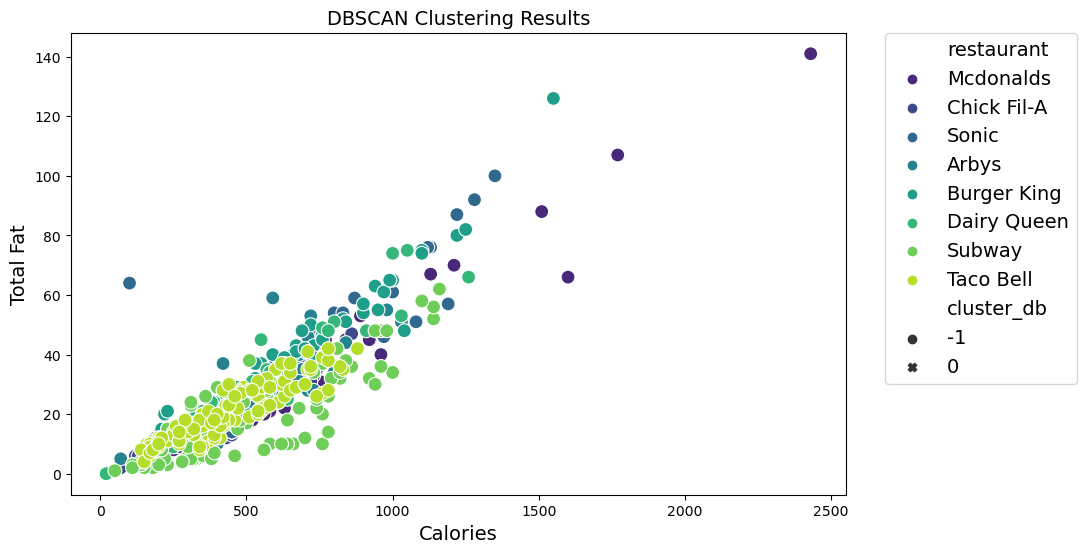

In [157]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='total_fat', hue='restaurant', style='cluster_db', data=fastfood_df, palette='viridis', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We observe that DBScan clusters aren't well captured

# Conclusion

Overall from a business perspective, the following embeddings are able to capture the clusters well by reducing the dimensions
- MDS embedding
- t-SNE embedding
- UMAP embedding


# Cluster members for best models(MDS, t-SNE, UMAP)

## MDS

In [245]:
mds = MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2, random_state=42)
X_mds = mds.fit_transform(fastfood_processed)

kmeans = KMeans(n_clusters=4, random_state=42)
fastfood_df['cluster_mds'] = kmeans.fit_predict(X_mds)  

C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [246]:
# List members of each cluster by instance_name
clusters = fastfood_df.groupby('cluster_mds')['item'].apply(list).reset_index()
for index, row in clusters.iterrows():
    print(f"Cluster {row['cluster_mds']}:")
    for instance in row['item']:
        print(f"  - {instance}")

Cluster 0:
  - 12 piece Buttermilk Crispy Chicken Tenders
  - Premium Southwest Salad w/ Grilled Chicken
  - 30 piece Chicken Nuggets
  - Regular Grilled Chicken Sub Sandwich
  - Buffalo Dunked Ultimate Chicken Sandwich
  - Garlic Parmesan Dunked Ultimate Chicken Sandwich
  - American Brewhouse King
  - Bacon & Swiss Sourdough King
  - Bacon Cheeseburger
  - Bacon Cheeseburger Deluxe
  - Bacon King
  - Bacon King Jr
  - BBQ Bacon King
  - Cheeseburger
  - Double Bacon Cheeseburger
  - Double Cheeseburger
  - Double Hamburger
  - Double Quarter Pound King
  - Extra Long Cheeseburger
  - Farmhouse King
  - Hamburger
  - Homestyle Cheeseburger
  - Jalapeno King Sandwich
  - Mushroom & Swiss King
  - Rodeo Burger
  - Rodeo King
  - Sourdough King Single
  - Sourdough King Double
  - Steakhouse King
  - Bacon & Cheese Whopper
  - DOUBLE WHOPPER w/o Cheese
  - DOUBLE WHOPPER w/ Cheese
  - WHOPPER w/o Cheese
  - WHOPPER w/ Cheese
  - WHOPPER JR. w/o Cheese
  - WHOPPER JR. w/ Cheese
  - Bacon 

## t-SNE

In [247]:
tsne = TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0)
X_tsne = tsne.fit_transform(fastfood_processed)

kmeans = KMeans(n_clusters=4, random_state=42)
fastfood_df['cluster_tsne'] = kmeans.fit_predict(X_tsne)

C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\STSC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [248]:
# List members of each cluster by instance_name
clusters = fastfood_df.groupby('cluster_tsne')['item'].apply(list).reset_index()
for index, row in clusters.iterrows():
    print(f"Cluster {row['cluster_tsne']}:")
    for instance in row['item']:
        print(f"  - {instance}")

Cluster 0:
  - Chargrilled Chicken Club Sandwich
  - Chargrilled Chicken Sandwich
  - Chick-n-Slider
  - 1 Piece Chick-n-Strips
  - 2 Piece Chick-n-Strips
  - 3 Piece Chick-n-Strips
  - 4 piece Chick-n-Strips
  - Chicken Deluxe
  - 4 piece Chicken Nuggets
  - 6 piece Chicken Nuggets
  - 8 piece Chicken Nuggets
  - 12 piece Chicken Nuggets
  - 30 piece Chicken Nuggets
  - Chicken Salad Sandwich
  - Chicken Sandwich
  - 4 Piece Grilled Chicken Nuggets
  - 6 Piece Grilled Chicken Nuggets
  - 8 piece Grilled Chicken Nuggets
  - 12 Piece Grilled Chicken Nuggets
  - Spicy Grilled Chicken Sub Sandwich
  - Regular Grilled Chicken Sub Sandwich
  - Smokehouse BBQ Bacon Sandwich
  - Spicy Chicken Sandwich
  - Spicy Deluxe
  - Chargrilled Chicken Cool Wrap
  - Chicken Enchiladas Meal Kit
  - Chicken Parmesan Meal Kit
  - Arby's Melt
  - Arby-Q Sandwich
  - Beef 'n Cheddar Classic
  - Beef 'n Cheddar Mid
  - Bourbon BBQ Brisket Sandwich
  - Bourbon BBQ Chicken Sandwich
  - Bourbon BBQ Steak Sandwic

## UMAP

In [249]:
# List members of each cluster by instance_name
clusters = fastfood_df.groupby('cluster_umap')['item'].apply(list).reset_index()
for index, row in clusters.iterrows():
    print(f"Cluster {row['cluster_umap']}:")
    for instance in row['item']:
        print(f"  - {instance}")

Cluster 0:
  - Artisan Grilled Chicken Sandwich
  - Single Bacon Smokehouse Burger
  - Double Bacon Smokehouse Burger
  - Grilled Bacon Smokehouse Chicken Sandwich
  - Crispy Bacon Smokehouse Chicken Sandwich
  - Big Mac
  - Cheeseburger
  - Classic Chicken Sandwich
  - Double Cheeseburger
  - Double Quarter Pounder® with Cheese
  - Filet-O-Fish®
  - Garlic White Cheddar Burger
  - Grilled Garlic White Cheddar Chicken Sandwich
  - Crispy Garlic White Cheddar Chicken Sandwich
  - Hamburger
  - Lobster Roll
  - Maple Bacon Dijon 1/4 lb Burger
  - Grilled Maple Bacon Dijon Chicken Sandwich
  - Crispy Maple Bacon Dijon Chicken Sandwich
  - McChicken
  - McDouble
  - McRib
  - Pico Guacamole 1/4 lb Burger
  - Grilled Pico Guacamole Chicken Sandwich
  - Crispy Pico Guacamole Chicken Sandwich
  - Premium Buttermilk Crispy Chicken Deluxe Sandwich
  - Premium Crispy Chicken Deluxe Sandwich
  - Quarter Pounder® with Cheese
  - Signature Sriracha Burger
  - Grilled Signature Sriracha Chicken Sand